# 🚀 Quick Start Guide

Welcome to the China Stock Data library! This notebook will get you started in just a few minutes.

## Step 1: Import the Library

In [1]:
from china_stock_data import StockData, StockMarket
import pandas as pd
import matplotlib.pyplot as plt

print("✅ Library imported successfully!")
print("Ready to analyze Chinese stock market data! 📈")

✅ Library imported successfully!
Ready to analyze Chinese stock market data! 📈


## Step 2: Get Stock Data

In [2]:
# Create a stock instance (using Ping An Bank as example)
stock = StockData(symbol="600519", days=30)

# Get historical price data
price_data = stock.get_data("kline")

print(f"📊 Retrieved {len(price_data)} days of data for stock {stock.symbol}")
print(f"📅 Date range: {price_data.index.min()} to {price_data.index.max()}")
print(f"💰 Latest price: ¥{price_data['收盘'].iloc[-1]:.2f}")

# Show first few rows
price_data.head()

📊 Retrieved 21 days of data for stock 600519
📅 Date range: 0 to 20
💰 Latest price: ¥1501.23


,日期,股票代码,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率,平均,加权平均
0,2025-08-11,600519,1423.50,1445.00,1451.99,1423.00,47159,6.794034e+09,2.04,1.69,24.03,0.38,1437.495,1440.665428
1,2025-08-12,600519,1449.00,1437.04,1465.07,1436.00,42019,6.095342e+09,2.01,-0.55,-7.96,0.33,1450.535,1450.615682
2,2025-08-13,600519,1425.00,1420.05,1433.68,1420.00,65528,9.325460e+09,0.95,-1.18,-16.99,0.52,1426.840,1423.126007
3,2025-08-14,600519,1420.94,1426.99,1447.51,1420.94,48129,6.897535e+09,1.87,0.49,6.94,0.38,1434.225,1433.134977
4,2025-08-15,600519,1426.01,1422.08,1428.66,1420.22,47582,6.772437e+09,0.59,-0.34,-4.91,0.38,1424.440,1423.319112


## Step 3: Basic Analysis

In [3]:
# Calculate basic statistics
if not price_data.empty:
    latest_price = price_data['收盘'].iloc[-1]
    highest_price = price_data['最高'].max()
    lowest_price = price_data['最低'].min()
    avg_volume = price_data['成交量'].mean()
    
    # Price change calculation
    first_price = price_data['收盘'].iloc[0]
    price_change = ((latest_price / first_price) - 1) * 100
    
    print("📈 STOCK ANALYSIS SUMMARY")
    print("=" * 40)
    print(f"Stock Symbol: {stock.symbol}")
    print(f"Current Price: ¥{latest_price:.2f}")
    print(f"Period Change: {price_change:+.2f}%")
    print(f"Price Range: ¥{lowest_price:.2f} - ¥{highest_price:.2f}")
    print(f"Average Volume: {avg_volume:,.0f}")
else:
    print("❌ No data available for analysis")

📈 STOCK ANALYSIS SUMMARY
Stock Symbol: 600519
Current Price: ¥1501.23
Period Change: +3.89%
Price Range: ¥1420.00 - ¥1509.00
Average Volume: 48,175


## Step 4: Simple Visualization

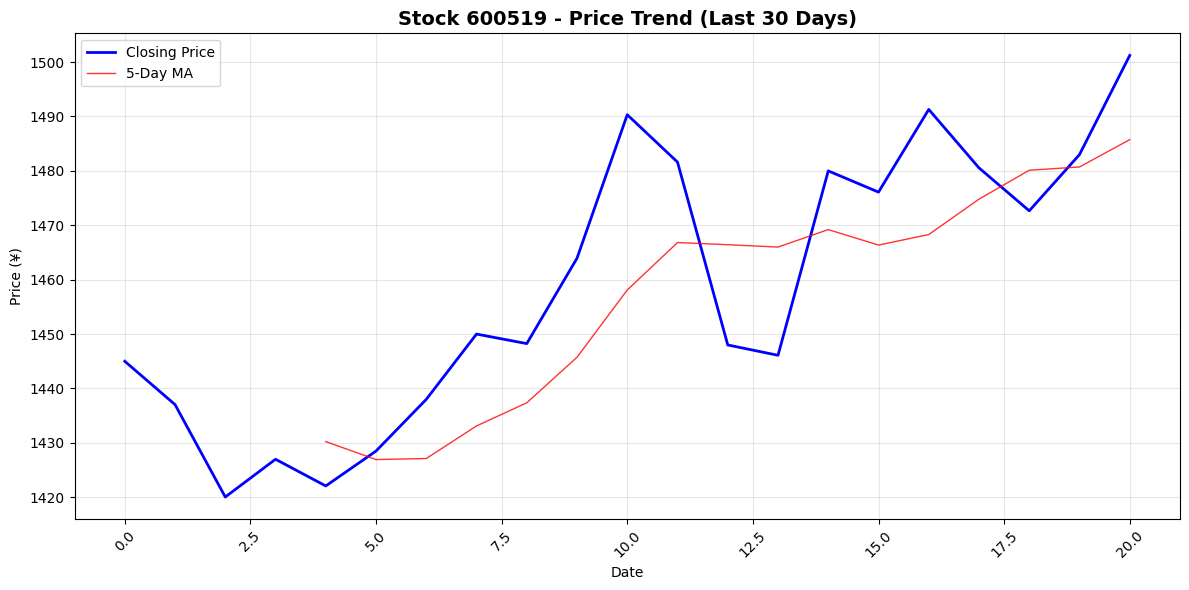

📊 Chart created successfully!


In [4]:
# Create a simple price chart
if not price_data.empty:
    plt.figure(figsize=(12, 6))
    
    # Plot closing price
    plt.plot(price_data.index, price_data['收盘'], linewidth=2, color='blue', label='Closing Price')
    
    # Add 5-day moving average
    ma5 = price_data['收盘'].rolling(5).mean()
    plt.plot(price_data.index, ma5, linewidth=1, color='red', alpha=0.8, label='5-Day MA')
    
    plt.title(f'Stock {stock.symbol} - Price Trend (Last 30 Days)', fontsize=14, fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('Price (¥)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    print("📊 Chart created successfully!")
else:
    print("❌ No data available for visualization")

## Step 5: Explore More Data Types

In [7]:
# Show all available data types
print("🔍 Available data types for stocks:")
for fetcher_name in stock.fetchers.keys():
    print(f"  • {fetcher_name}")

# Try to get company information
try:
    company_info = stock.get_data("info")
    print("\n🏢 Company Information:")
    if isinstance(company_info, pd.Series):
        print(company_info)
    elif isinstance(company_info, pd.DataFrame):
        print(company_info.head())
    else:
        print(company_info)
except Exception as e:
    print(f"\n⚠️  Company info not available: {e}")

# Try to get real-time data
try:
    realtime_data = stock.get_data("bid_ask")
    print("\n⚡ Bid ask Data:")
    if not realtime_data.empty:
        print(realtime_data.head())
    else:
        print("No bid ask data available (normal during non-trading hours)")
except Exception as e:
    print(f"\n⚠️  Real-time data not available: {e}")

🔍 Available data types for stocks:
  • kline
  • info
  • chip
  • bid_ask

🏢 Company Information:
   item             value
0  股票代码            600519
1  股票简称              贵州茅台
2   总股本      1252270215.0
3   流通股      1252270215.0
4   总市值  1879945614864.45
Fetching stock realtime data!
Error fetching data: '600519'
警告：获取的数据无效，返回空DataFrame。

⚡ Real-time Data:
No real-time data available (normal during non-trading hours)


## Step 6: Market-Level Analysis

In [6]:
# Explore market-level data
market = StockMarket()

print("🏦 Available market data types:")
for fetcher_name in market.fetchers.keys():
    print(f"  • {fetcher_name}")

# Get market sentiment
try:
    sentiment = market.get_data("sentiment")
    print(f"\n📊 Market sentiment data: {sentiment.shape}")
    print(sentiment.head() if not sentiment.empty else "No sentiment data available")
except Exception as e:
    print(f"\n⚠️  Market sentiment not available: {e}")

# Get index list
try:
    index_list = market.get_data("index_list")
    print(f"\n📈 Available indices: {len(index_list)}")
    print("First 5 indices:")
    print(index_list.head())
except Exception as e:
    print(f"\n⚠️  Index list not available: {e}")

🏦 Available market data types:
  • index_components
  • index_list
  • market_motion
  • us_index

⚠️  Market sentiment not available: Unknown data type: sentiment
Fetching index list data!

📈 Available indices: 726
First 5 indices:
  index_code display_name publish_date
0     000001         上证指数   1991-07-15
1     000002         A股指数   1992-02-21
2     000003         B股指数   1992-02-21
3     000004         工业指数   1993-05-03
4     000005         商业指数   1993-05-03


## 🎉 Congratulations!

You've successfully completed the quick start guide! Here's what you learned:

✅ **Basic Data Retrieval**: Get stock price data with just a few lines of code  
✅ **Simple Analysis**: Calculate returns, price ranges, and basic statistics  
✅ **Visualization**: Create professional-looking charts  
✅ **Data Types**: Explore different types of market data  
✅ **Market Analysis**: Access market-level indicators and indices  

## 🚀 Next Steps

Ready for more advanced analysis? Check out these other examples:

- **`professional_analysis.ipynb`** - Deep technical analysis with multiple indicators
- **`portfolio_analysis.ipynb`** - Portfolio optimization and risk management

## 💡 Pro Tips

1. **Error Handling**: Always wrap data fetching in try-except blocks
2. **Data Availability**: Not all data types are available for all stocks
3. **Trading Hours**: Real-time data is only available during market hours
4. **Rate Limits**: Don't make too many requests too quickly

Happy analyzing! 📈✨